# Celebrity Face Detection using YOLOv8 

This notebook demonstrates how to train a YOLOv8 model for celebrity face detection using a custom dataset from Roboflow. The dataset was annotated on Roboflow


## Importing necessary dependencies

First, we’ll install the required libraries and import the necessary
modules.

In [ ]:
# Install the ultralytics and roboflow libraries
%pip install ultralytics roboflow

# Import required modules
from ultralytics import YOLO  # For YOLOv8 model
import cv2 as cv  # For image processing
import matplotlib.pyplot as plt  # For visualization
import os  # For file and directory operations

## Downloading the Annotated Dataset from Roboflow

We’ll use Roboflow to download our pre-annotated celebrity face
detection dataset.

In [ ]:
# Initialize Roboflow and download the dataset
from roboflow import Roboflow

# Replace with your actual Roboflow API key
rf = Roboflow(api_key="YOUR-API-KEY")

# Access the project and download the dataset
project = rf.workspace("puspendu-ai-vision-workspace").project("celebrity-face-detection")
version = project.version(1)
dataset = version.download("yolov8")

# Note: The dataset will be downloaded in YOLOv8 format, which is compatible with our model

Now, let’s inspect the directory structure of our downloaded dataset:

In [ ]:
# Install the 'tree' command for visualizing directory structure
!apt-get install tree

# Display the directory structure of the downloaded dataset
!tree -L 2 "Celebrity-Face-Detection-1"

# This will show us the organization of our dataset, including train, valid, and test splits

## Model Training

Now we’ll train our YOLOv8 model on the celebrity face detection
dataset.

Note: Make sure to update your `data.yaml` file with the absolute path
of the dataset if necessary.

In [ ]:
# Initialize the YOLOv8 model
model = YOLO("yolov8l.pt")  # We're using the large variant of YOLOv8

# Start the training process
model.train(
    data="Celebrity-Face-Detection-1/data.yaml",  # Path to the data configuration file
    epochs=50,  # Number of training epochs
    imgsz=640  # Input image size
)

# The trained model will be saved in the 'runs/detect/train' directory

## Testing the Model

After training, we’ll create a function to display predictions on test
images:

In [20]:

def display_prediction(image_path, save_fig = False, filename = None):
    """
    Function to display predictions on a given image using our trained model.
    
    Args:
    image_path (str): Path to the input image
    """
    # Load the trained model
    trained_model = YOLO("runs/detect/train4/weights/best.pt")
    
    # Make predictions
    result = trained_model.predict(source=image_path, conf = 0.5)
    
    # Convert the result to RGB for display
    rgb_image = cv.cvtColor(result[0].plot(), cv.COLOR_BGR2RGB)
    
    # Display the result
    fig = plt.figure(figsize=(10, 8))
    plt.imshow(rgb_image)
    plt.axis('off')

    save_dir = 'DATA/predicted_images'
    if save_fig and filename:
        file_path = os.path.join(save_dir, filename)
        fig.savefig(file_path, dpi = 200, bbox_inches='tight')
    plt.show()

    




image 1/1 d:\PyCharm\PyCharm_files\YOLO_CV\CELEBRITY FACE DETECTION\DATA\test_images\katherine.jpg: 640x480 1 KATHERINE-LANGFORD, 1339.8ms
Speed: 82.0ms preprocess, 1339.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


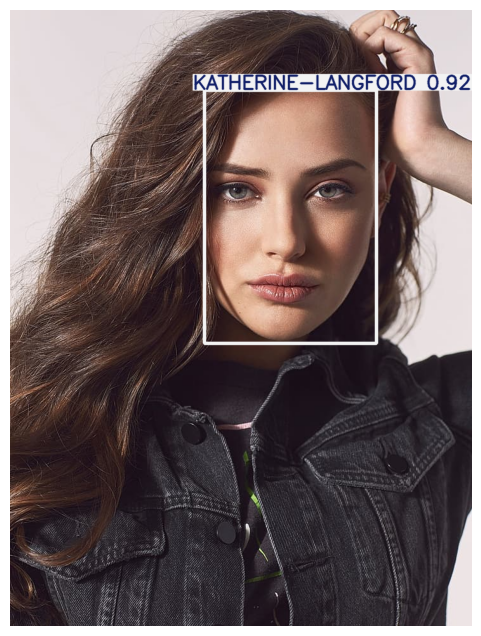

In [15]:
# Test the model on sample images
display_prediction("DATA/test_images/katherine.jpg", save_fig=True, filename='katherine_labelled.jpg')


image 1/1 d:\PyCharm\PyCharm_files\YOLO_CV\CELEBRITY FACE DETECTION\DATA\test_images\Ronaldo.jpg: 448x640 1 CRISTIANO-RONALDO, 1025.0ms
Speed: 6.0ms preprocess, 1025.0ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


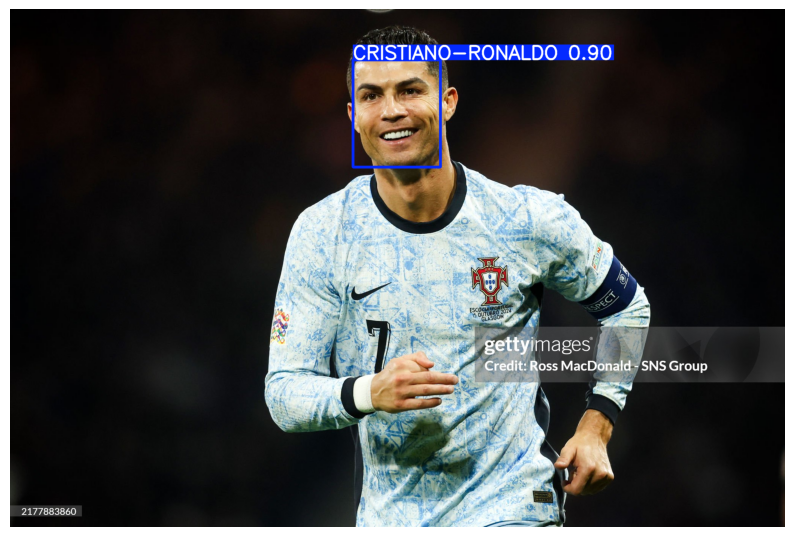

In [16]:
display_prediction("DATA/test_images/Ronaldo.jpg", save_fig=True, filename='ronaldo_labelled.jpg')


image 1/1 d:\PyCharm\PyCharm_files\YOLO_CV\CELEBRITY FACE DETECTION\DATA\test_images\Sharapova.jpeg: 448x640 1 MARIA-SARAPOVA, 1556.1ms
Speed: 5.0ms preprocess, 1556.1ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


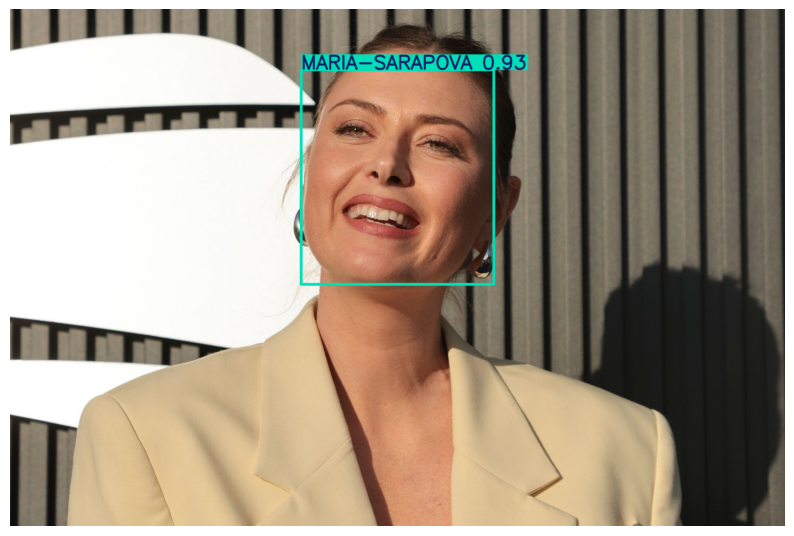

In [17]:
display_prediction("DATA/test_images/Sharapova.jpeg", save_fig=True, filename='sharapova_labelled.jpg')


image 1/1 d:\PyCharm\PyCharm_files\YOLO_CV\CELEBRITY FACE DETECTION\DATA\test_images\Virat.jpg: 608x640 1 VIRAT-KOHLI, 2285.9ms
Speed: 9.0ms preprocess, 2285.9ms inference, 1.0ms postprocess per image at shape (1, 3, 608, 640)


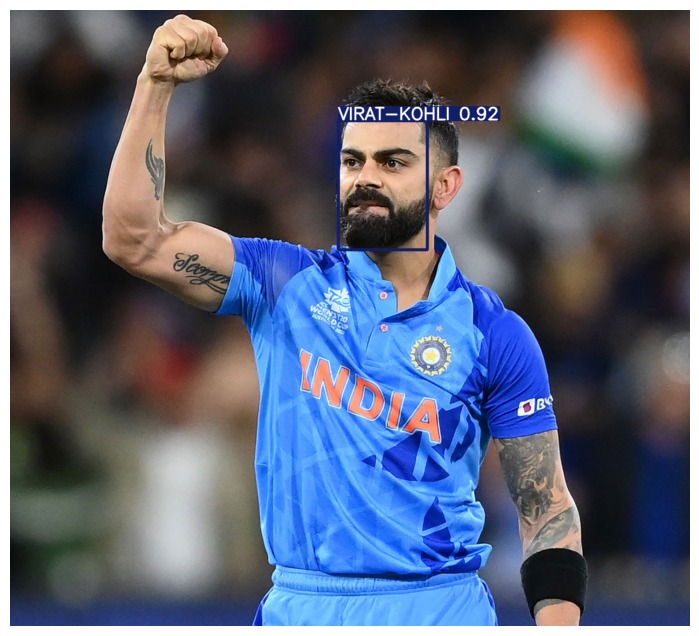

In [18]:
display_prediction("DATA/test_images/Virat.jpg", save_fig=True, filename='Virat_labelled.jpg')


image 1/1 d:\PyCharm\PyCharm_files\YOLO_CV\CELEBRITY FACE DETECTION\DATA\test_images\Elon-Musk.jpg: 640x384 1 ELON-MUSK, 876.6ms
Speed: 5.0ms preprocess, 876.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 384)


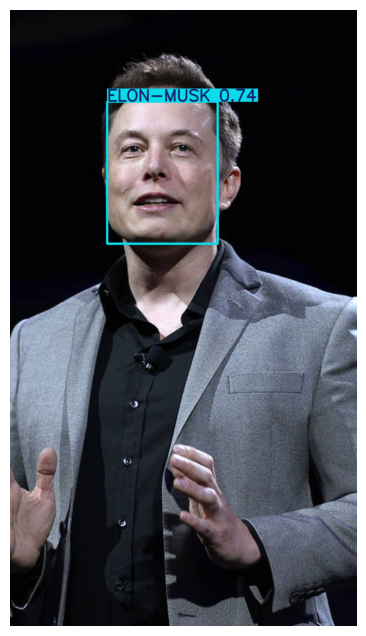

In [21]:
display_prediction("DATA/test_images/Elon-Musk.jpg", save_fig=True, filename='Elon_labelled.jpg')

## Conclusion

This notebook demonstrates the process of training a YOLOv8 model for
celebrity face detection. Here’s a summary of what we’ve done:

1.  Installed necessary libraries (ultralytics, roboflow)
2.  Downloaded and prepared the dataset from Roboflow
3.  Trained the YOLOv8 model on our custom dataset
4.  Created a function to visualize predictions on test images

To improve the model further, you could: - Experiment with different
YOLOv8 variants (nano, small, medium, large, extra-large) - Adjust training parameters
(learning rate, batch size, etc.) - Augment the dataset to increase its
size and variety - Fine-tune the model on a larger, more diverse dataset
of celebrity faces

You can check out the project on Robloflow by clicking [here](https://universe.roboflow.com/puspendu-ai-vision-workspace/celebrity-face-detection)
